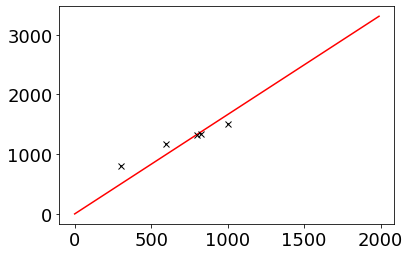

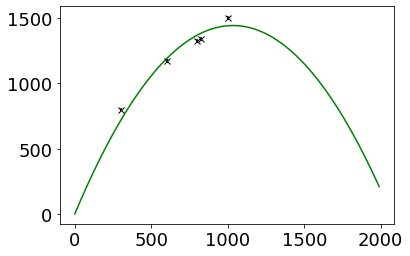

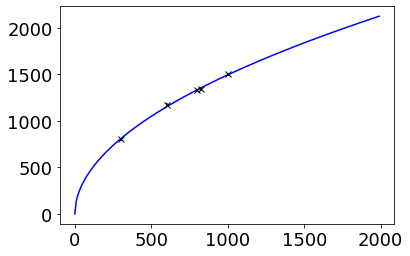

In [55]:
h = np.array([300, 600, 800, 828, 1000])
d = np.array([800, 1172, 1328, 1340, 1500])
sig = np.array([15, 15, 15, 15, 15])

## Hypotheses

def f1(h, *vars):
    a, = vars
    return a*h

def f2(h, *vars):
    a, b = vars
    return a*h + b*h**2

def f3(h, *vars):
    a, b = vars
    return a*h**b

## Least squares

p0_one = np.array([1.0])
theta_hat_one, covariance_one = curve_fit(f1, h, d, p0_one, sig, absolute_sigma=True)

p0_two = np.array([1.0, 1.0])
theta_hat_two, covariance_two = curve_fit(f2, h, d, p0_two, sig, absolute_sigma=True)

p0_three = np.array([1.0, 1.0])
theta_hat_three, covariance_three = curve_fit(f3, h, d, p0_three, sig, absolute_sigma=True)

## Curve fitting

fit_one = np.vectorize(lambda h : theta_hat_one[0]*h)
fit_two = np.vectorize(lambda h : theta_hat_two[0]*h + theta_hat_two[1]*h**2)
fit_three = np.vectorize(lambda h : theta_hat_three[0]*h**theta_hat_three[1])

## Plotting

## Create plots
fig4 = plt.figure()
fig5 = plt.figure()
fig6 = plt.figure()
ax4 = fig4.add_subplot()
ax5 = fig5.add_subplot()
ax6 = fig6.add_subplot()

h_val = np.arange(0, 2000, 10)

## Plot given data with sigma
ax4.errorbar(h, d, yerr=15, fmt='kx')
ax4.plot(h_val, fit_one(h_val), 'r', label="first hypothesis")

ax5.errorbar(h, d, yerr=15, fmt='kx')
ax5.plot(h_val, fit_two(h_val), 'g', label="second hypothesis")

ax6.errorbar(h, d, yerr=15, fmt='kx')
ax6.plot(h_val, fit_three(h_val), 'b', label="second hypothesis")

